# CME 193 - Scientific Python
### Lecture 4 (4/14)
Spring 2016, Stanford University

## Administrative Details
* No class next Tuesday!
* Homework will be released over the weekend (sorry for the delay)

## Last time...
* Primative Data Structures
* Intro to Numpy!

## Today
* Some more advanced numpy
* Some plotting
* A cool SciPy example!

# More Numpy

* Fundamental package for scientific computing with Python
* N-dimensional array object
* Linear algebra, Fourier transform, random number capabilities
* Building block for other packages (e.g. Scipy, scikit-learn)
* Open source, huge dev community!

In [225]:
import numpy as np

In [175]:
a = np.arange(4)
print 'a = ', a

a =  [0 1 2 3]


In [176]:
b = np.array([2, 3, 2, 4])
print 'b =', b

b = [2 3 2 4]


In [177]:
print 'a * b =', a * b 
print 'b - a =', b - a  
c = [2, 3, 4, 5]
print 'c =', c
print 'a * c =', a * c 
# if we want, we can also use +=, -=, *=, etc

a * b = [ 0  3  4 12]
b - a = [2 2 0 1]
c = [2, 3, 4, 5]
a * c = [ 0  3  8 15]


## Array Broadcasting

When operating on two arrays, numpy compares shapes. Two dimensions are compatible when:

* They are of equal size
* One of them is 1

What does this look like in a picture?

![bc](./nb-assets/img/broadcasting.png)

Array broadcasting also works with scalars

This also allows us to add a constant to a matrix or multiply a matrix by a constant

In [178]:
A = np.ones((3,3))
print 3 * A - 1

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


Numpy gives us vector ops!

In [179]:
u = [1, 2, 3]
v = [1, 1, 1]

In [180]:
print 'np.inner(u, v) =', np.inner(u, v)

print 'np.outer(u, v) =\n', np.outer(u, v)

print 'np.dot(u, v) =', np.dot(u, v)

np.inner(u, v) = 6
np.outer(u, v) =
[[1 1 1]
 [2 2 2]
 [3 3 3]]
np.dot(u, v) = 6


More matrix operations

In [181]:
# first, some matricies
A = np.ones((3, 2))
print 'A.T =\n', A.T
B = np.ones((2, 3))
print 'B =\n', B

A.T =
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
B =
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


Which ones of these are valid?
```python
print 'np.dot(A, B) =\n', np.dot(A, B)

print 'np.dot(B, A) =\n', np.dot(B, A)

print 'np.dot(B.T, A.T) =\n', np.dot(B.T, A.T)

print 'np.dot(A, B.T) =\n', np.dot(A, B.T)
```

In [182]:
print 'np.dot(A, B) =\n', np.dot(A, B)

np.dot(A, B) =
[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


In [183]:
print 'np.dot(B, A) =\n', np.dot(B, A)

np.dot(B, A) =
[[ 3.  3.]
 [ 3.  3.]]


In [184]:
print 'np.dot(B.T, A.T) =\n', np.dot(B.T, A.T)

np.dot(B.T, A.T) =
[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


In [185]:
print 'np.dot(A, B.T) =\n', np.dot(A, B.T)

np.dot(A, B.T) =


ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [186]:
# -- lets see what operations we can do across the axes of a matrix
a = np.random.random((2,3))
print 'a =\n', a

print '\na.sum() =', a.sum()

print '\na.sum(axis=0) =', a.sum(axis=0)

print '\na.cumsum() =', a.cumsum()

print '\na.cumsum(axis=1) =', a.cumsum(axis=1)

print '\na.min() =', a.min()

print '\na.max(axis=0) =', a.max(axis=0)


a =
[[ 0.47623094  0.0857769   0.923002  ]
 [ 0.69339628  0.96353318  0.7157176 ]]

a.sum() = 3.85765690381

a.sum(axis=0) = [ 1.16962722  1.04931008  1.6387196 ]

a.cumsum() = [ 0.47623094  0.56200784  1.48500984  2.17840613  3.14193931  3.8576569 ]

a.cumsum(axis=1) = [[ 0.47623094  0.56200784  1.48500984]
 [ 0.69339628  1.65692946  2.37264706]]

a.min() = 0.0857769008015

a.max(axis=0) = [ 0.69339628  0.96353318  0.923002  ]


In [187]:
# -- arrays are like lists, they can be sliced!

a = np.random.random((4,5))
print 'a =\n', a
print '\na[2, :] =', a[2, :]
# third row, all columns
print '\na[1:3] =', a[1:3]
# 2nd, 3rd row, all columns
print '\na[:, 2:4] =', a[:, 2:4]
# all rows, columns 3 and 4

a =
[[ 0.34296743  0.80266225  0.21422598  0.07833627  0.27805466]
 [ 0.53126287  0.19729885  0.04696256  0.79380008  0.54489992]
 [ 0.61683247  0.95651728  0.09852218  0.52969981  0.07618432]
 [ 0.6473786   0.52226079  0.59290397  0.58380562  0.9448792 ]]

a[2, :] = [ 0.61683247  0.95651728  0.09852218  0.52969981  0.07618432]

a[1:3] = [[ 0.53126287  0.19729885  0.04696256  0.79380008  0.54489992]
 [ 0.61683247  0.95651728  0.09852218  0.52969981  0.07618432]]

a[:, 2:4] = [[ 0.21422598  0.07833627]
 [ 0.04696256  0.79380008]
 [ 0.09852218  0.52969981]
 [ 0.59290397  0.58380562]]


## Iterating

Iterating over multidimensional arrays is done with respect to the first axis: `for row in A`

One can loop over all elements with `for element in A.flat`

## Reshaping

Reshape using `reshape`. Total size must remain the same. For example, 
```python
a = np.arange(10).reshape((2,5))
```

## Linear Algebra

Start with `import numpy.linalg as la`

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eig(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

## Random Numbers

Start with `import numpy.random as rng`

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

## Advanced Numpy

In [226]:
A = np.random.normal(0, 1, (4, 4))
print A

[[-0.22096906  0.14572631  0.76177951 -0.18998748]
 [-0.49046559  1.00491722  0.96755576 -0.63314531]
 [ 1.61691851 -0.84905022  0.06227401 -0.43981804]
 [-0.75149588 -1.85862846  1.62607115  1.67048571]]


In [227]:
A[1, ::-1] = range(A.shape[1])
print A

[[-0.22096906  0.14572631  0.76177951 -0.18998748]
 [ 3.          2.          1.          0.        ]
 [ 1.61691851 -0.84905022  0.06227401 -0.43981804]
 [-0.75149588 -1.85862846  1.62607115  1.67048571]]


In [228]:
A[np.diag_indices_from(A)] += 11.0
print A

[[ 10.77903094   0.14572631   0.76177951  -0.18998748]
 [  3.          13.           1.           0.        ]
 [  1.61691851  -0.84905022  11.06227401  -0.43981804]
 [ -0.75149588  -1.85862846   1.62607115  12.67048571]]


We have all the standard matrix decompositions in Numpy! Let's do the SVD.

The SVD states that for a matrix $A$, we can find $U$, $S$, and $V$ such that

$$
A = USV^T,
$$

where $U$ and $V$ are unitary and S is diagonal.

In [229]:
# -- lets make a new matrix A!
A = np.random.normal(0, 2, (4, 4))
print 'A = '
print A

print '\nA^T = '
print A.T

A = 
[[ 1.54388122 -1.12034591  2.20359774 -0.7319467 ]
 [ 1.04501887 -1.10611156 -1.97218464 -3.10609537]
 [ 1.35227705  1.72672689  0.23990681  0.45996125]
 [-0.43460698  2.17951651 -0.48570388  1.42140066]]

A^T = 
[[ 1.54388122  1.04501887  1.35227705 -0.43460698]
 [-1.12034591 -1.10611156  1.72672689  2.17951651]
 [ 2.20359774 -1.97218464  0.23990681 -0.48570388]
 [-0.7319467  -3.10609537  0.45996125  1.42140066]]


In [ ]:
# -- Unpacking!
d = {}
d['U'], d['S'], d['V'] = np.linalg.svd(A)
U, S, V = d['U'], d['S'], d['V']

In [230]:
for M in ['U', 'S', 'V']:
    print '{} = \n{}'.format(M, d[M])

U = 
[[-0.26915078  0.81831522 -0.27023625  0.42998886]
 [-0.77789751 -0.47867145 -0.35357377  0.20182837]
 [ 0.23154638  0.04753641 -0.84629352 -0.47740322]
 [ 0.51847814 -0.31460155 -0.29282286  0.73923004]]
S = 
[ 4.58808669  3.25609812  2.33927036  0.18205208]
V = 
[[-0.24861644  0.58670043  0.16232914  0.75340674]
 [ 0.29611246 -0.30433019  0.89416026  0.14204919]
 [-0.77112266 -0.60090529  0.01753298  0.20970281]
 [-0.50584297  0.4495315   0.41691639 -0.6068155 ]]


In [232]:
# -- lets turn S back to a matrix, and verify!
Sd = np.diag(S)

A_try = U.dot(Sd).dot(V)

In [233]:
print 'Reconstructed'
print A_try

Reconstructed
[[ 1.54388122 -1.12034591  2.20359774 -0.7319467 ]
 [ 1.04501887 -1.10611156 -1.97218464 -3.10609537]
 [ 1.35227705  1.72672689  0.23990681  0.45996125]
 [-0.43460698  2.17951651 -0.48570388  1.42140066]]


In [234]:
print '\nOriginal'
print A


Original
[[ 1.54388122 -1.12034591  2.20359774 -0.7319467 ]
 [ 1.04501887 -1.10611156 -1.97218464 -3.10609537]
 [ 1.35227705  1.72672689  0.23990681  0.45996125]
 [-0.43460698  2.17951651 -0.48570388  1.42140066]]


Let's test a cool feature of the SVD! Given $A = U S V^T$, we have that 

$$
A^{-1} = (U S V^{T}) ^ {-1} = V^{-T} S^{-1} U^{-1} = V S^{-1} U^T
$$

So basically, we can invert the diagonals in $S$ and get our inverse!

In [235]:
Ainv_ours = V.T.dot(np.diag(1 / S)).dot(U.T)
Ainv = np.linalg.inv(A)

In [236]:
print 'Ours'
print Ainv_ours

Ours
[[-1.01666648 -0.44561831  1.59724475 -2.01417476]
 [ 1.02026499  0.53445454 -0.93626686  1.99626531]
 [ 1.19788515  0.30058502 -1.07839506  1.62266265]
 [-1.46596054 -0.85305012  1.55550945 -2.4188353 ]]


In [237]:
print '\nStandard way'
print Ainv


Standard way
[[-1.01666648 -0.44561831  1.59724475 -2.01417476]
 [ 1.02026499  0.53445454 -0.93626686  1.99626531]
 [ 1.19788515  0.30058502 -1.07839506  1.62266265]
 [-1.46596054 -0.85305012  1.55550945 -2.4188353 ]]


# Matplotlib

Matplotlib is the most commonly used Python plotting library. If you're coming from a Matlab background, the API is meant to emulate that style of workflow.

The Matplotlib + IPython stack is quite useful. As you'll see (through experimentation), matplotlib is complicated and large, and you will *usually* need some experimentation to figure out what to do.

In [238]:
# -- set this so stuff happens in-notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

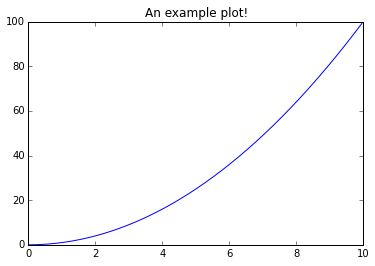

In [239]:
x = np.linspace(0, 10, 1000)
y = np.power(x, 2)
plt.plot(x, y)
plt.title('An example plot!')
plt.show()

Can get very involved! Most plotting code is very "boilerplate". I recommend looking at the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration and associated source code!

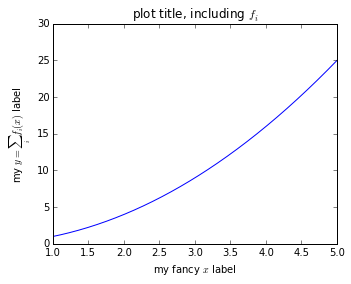

In [240]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

x = np.linspace(0, 10, 1000)
y = np.power(x, 2)
ax.plot(x, y)

ax.set_xlim((1, 5))
ax.set_ylim((0, 30))

# -- we can handle LaTeX!
ax.set_xlabel('my fancy $x$ label')
ax.set_ylabel('my $y = \sum_i f_{i}(x)$ label')

ax.set_title(r'plot title, including $f_i$')
plt.tight_layout()
# -- save to a PDF
plt.savefig('line_plot_plus.pdf')

Can histogram data! Very useful in the sciences.

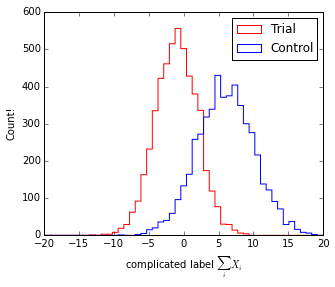

In [57]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

bins = np.linspace(-20, 20)

x1 = np.random.normal(-1, 3, 5000)
x2 = np.random.normal(6, 4, 5000)

plt.hist(x1, bins = bins, color='red', label = 'Trial', histtype='step')
plt.hist(x2, bins = bins, color='blue', label = 'Control', histtype='step')

ax.set_xlabel(r'complicated label $\sum_i X_i$')
ax.set_ylabel('Count!')
plt.legend()
plt.show()

2D histogram! These can be pretty!

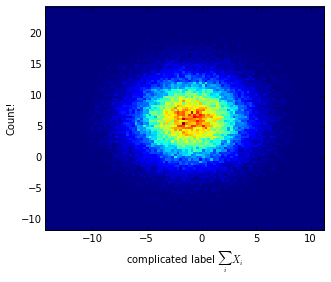

In [58]:

f, ax = plt.subplots(1, 1, figsize=(5,4))
bins = np.linspace(-20, 20)
plt.hist2d(np.random.normal(-1, 3, 100000), np.random.normal(6, 4, 100000), bins=100)
ax.set_xlabel(r'complicated label $\sum_i X_i$')
ax.set_ylabel('Count!')
plt.show()


# SciPy

SciPy is a library of algorithms and mathematical tools built to work with NumPy arrays.

* linear algebra - `scipy.linalg`
* statistics - `scipy.stats`
* optimization - `scipy.optimize`
* sparse matrices - `scipy.sparse`
* signal processing - `scipy.signal`
* etc.

Slightly different from numpy.linalg., SciPy *always* uses BLAS/LAPACK support, so could be faster in many cases!

## Optimization

* General purpose minimization: CG, BFGS, least-squares
* Constrainted minimization; non-negative least-squares
* Minimize using simulated annealing
* Scalar function minimization
* Root finding
* Check gradient function
* Line search

## Statistics

* Mean, median, mode, variance, kurtosis
* Pearson correlation coefficient
* Hypothesis tests (ttest, Wilcoxon signed-rank test, Kolmogorov-Smirnov)
* Gaussian kernel density estimation

## Matricies (sparse)

* Sparse matrix classes: CSC, CSR, etc.
* Functions to build sparse matrices
* `sparse.linalg` module for sparse linear algebra
* `sparse.csgrap`h for sparse graph routines
* Matlab files
* Matrix Market files (sparse matrices)
* `.wav` files

Quick example with Scipy!

In [113]:
from scipy.optimize import leastsq, fmin
from numpy import sin, cos, pi, sqrt

In [216]:
# Define a simple signal model
def model(par):
    p = 2.0
    return par[0] + par[1]*sin(2*pi*t/p) + (t/5) ** 2 * par[2]*(cos(2*pi*t/(p*(t + 1))))**2

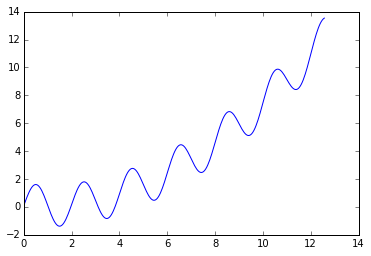

In [217]:
# Create some data with this model
par = [0.1, 1.5, 2]
t = np.linspace(0, 4 * pi, 300)
y = model(par)

plt.plot(t, y, label='data')

In [218]:
# Add a bit of gaussian noise
dy = 3*np.random.normal(0, 1, y.shape[0])
y += dy

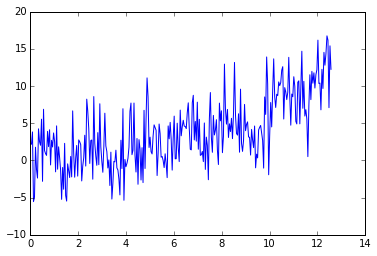

In [219]:
plt.plot(t, y, label='data')

In [220]:
# error function we minimize, simply the 1-norm
def resid(par):
    return np.sum(np.abs(model(par)-y))

In [221]:
x0 = np.array([0, 0, 0])
rez = fmin(resid, x0)

Optimization terminated successfully.
         Current function value: 720.169399
         Iterations: 203
         Function evaluations: 364


In [222]:
print 'Exact parameters: ', par
print 'Fitted parameters:', rez

Exact parameters:  [0.1, 1.5, 2]
Fitted parameters: [ 0.3248099   1.75849786  1.77051822]


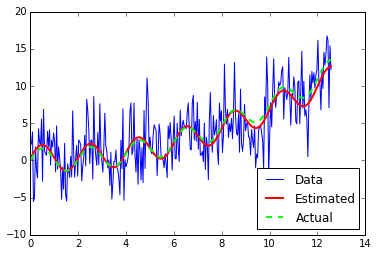

In [223]:
plt.plot(t, y, label='Data', color='blue')
plt.plot(t, model(rez), label='Estimated', color='red', linewidth=2)
plt.plot(t, model(par), '--', label='Actual', color='lime', linewidth=2)
plt.legend(loc=4)